In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,model_selection,svm,neighbors,linear_model
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import pickle
f = open('Train_Test_Data_Airport_Flight_Delays.pkl','rb')
df = pd.DataFrame(pickle.load(f))

In [ ]:
df.dropna()

,index,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME_INT,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,DEP_DEL15
0,843141,2,7,2,4,15,14,4769,819756,13382999,...,0.000099,15,41.785,-87.752,0.02,0.0,0.0,50.0,24.38,1
1,5398935,10,6,4,2,8,14,6890,819756,13382999,...,0.000099,19,41.785,-87.752,2.18,0.0,0.0,48.0,12.53,0
2,4661064,9,3,4,1,13,14,6386,819756,13382999,...,0.000099,4,41.785,-87.752,0.00,0.0,0.0,69.0,8.95,0
3,2018389,4,6,7,2,16,14,6362,819756,13382999,...,0.000099,2,41.785,-87.752,0.00,0.0,0.0,66.0,4.92,1
4,916026,2,7,3,3,12,14,4769,819756,13382999,...,0.000099,12,41.785,-87.752,0.20,3.1,0.0,27.0,11.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56347,2018435,4,6,3,4,14,14,6362,819756,13382999,...,0.000099,15,41.785,-87.752,0.00,0.0,0.0,66.0,4.92,0
56348,4835097,9,4,2,1,16,14,6386,819756,13382999,...,0.000099,5,41.785,-87.752,0.00,0.0,0.0,74.0,4.92,0
56349,822265,2,2,2,2,18,14,4769,819756,13382999,...,0.000099,9,41.785,-87.752,0.00,0.0,3.1,35.0,4.70,0
56350,4617665,9,7,3,2,11,14,6386,819756,13382999,...,0.000099,15,41.785,-87.752,0.34,0.0,0.0,73.0,4.47,0


In [ ]:
df['PRCP'] = pd.to_numeric(df['PRCP'],errors = 'coerce')
df['SNOW'] = pd.to_numeric(df['SNOW'],errors = 'coerce')
df['SNWD'] = pd.to_numeric(df['SNWD'],errors = 'coerce')
df['TMAX'] = pd.to_numeric(df['TMAX'],errors = 'coerce')
df['AWND'] = pd.to_numeric(df['AWND'],errors = 'coerce')

In [ ]:
#df = df.head(1000)

In [ ]:
y = df['DEP_DEL15'] == 1
X = df.drop('DEP_DEL15',axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022, stratify = y)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

## Linear SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svc = make_pipeline(StandardScaler(), LinearSVC(C = 1))  

In [ ]:
svc.fit(X_resampled, y_resampled)

c:\Users\Tina_\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1))])

In [ ]:
y_pred = svc.predict(X_test)
y_pred

array([ True,  True, False, ..., False,  True, False])

## Evaluation-Linear SVM

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.37      0.62      0.46      4486
       False       0.82      0.61      0.70     12420

    accuracy                           0.62     16906
   macro avg       0.59      0.62      0.58     16906
weighted avg       0.70      0.62      0.64     16906



[[0.16538507 0.09996451]
 [0.28356796 0.45108246]]


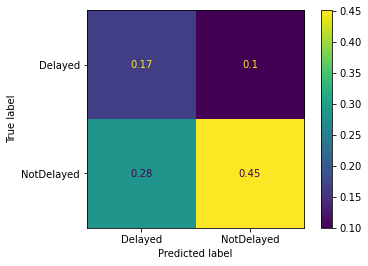

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test,y_pred ,labels=[1,0],normalize='all')
print(cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Delayed','NotDelayed'])
cmd.plot()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred)

0.6158760203478055

In [ ]:
balanced_accuracy_score(y_test, y_pred)

0.6177400544043627

## confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred, labels = [True, False])

array([[2789, 1697],
       [4797, 7623]], dtype=int64)

In [ ]:
svc.named_steps['linearsvc'].coef_[0]

array([ 1.93501568e-02, -8.66212809e-02, -1.92988862e-02, -2.90651031e-02,
        1.94006871e-01, -2.60124261e-02, -2.36493204e-02,  5.24386940e-02,
        0.00000000e+00,  4.74946024e-02, -1.56216902e-02, -3.77339789e-02,
       -7.95356029e-02,  2.49495648e-17, -1.66330432e-17,  6.69466461e-02,
        6.25611859e-02,  4.30297507e-02, -1.52352733e-02,  2.97408614e-02])

In [ ]:
pd.Series(svc.named_steps['linearsvc'].coef_[0], index = X.columns)

index                            1.935016e-02
MONTH                           -8.662128e-02
DAY_OF_WEEK                     -1.929889e-02
DISTANCE_GROUP                  -2.906510e-02
SEGMENT_NUMBER                   1.940069e-01
CONCURRENT_FLIGHTS              -2.601243e-02
CARRIER_NAME_INT                -2.364932e-02
AIRLINE_AIRPORT_FLIGHTS_MONTH    5.243869e-02
AVG_MONTHLY_PASS_AIRPORT         0.000000e+00
AVG_MONTHLY_PASS_AIRLINE         4.749460e-02
FLT_ATTENDANTS_PER_PASS         -1.562169e-02
GROUND_SERV_PER_PASS            -3.773398e-02
PLANE_AGE                       -7.953560e-02
LATITUDE                         2.494956e-17
LONGITUDE                       -1.663304e-17
PRCP                             6.694665e-02
SNOW                             6.256119e-02
SNWD                             4.302975e-02
TMAX                            -1.523527e-02
AWND                             2.974086e-02
dtype: float64

## Expected Value

In [ ]:
cost_benefit_matrix = np.array([
    [-50, -500      ], 
    [  -100, 100]])

cost_benefit_matrix

array([[ -50, -500],
       [-100,  100]])

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
(conf_mat * cost_benefit_matrix).sum()

-41.72187389092632

## Decision function

In [ ]:
scores = svc.decision_function(X_test)
scores

array([ 0.08025636,  0.11152679, -0.1230736 , ..., -0.30191333,
        0.18071745, -0.23124504])

In [ ]:
y_pred_2 = scores > -0.1

print(classification_report(y_test, y_pred_2, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.34      0.75      0.47      4486
       False       0.84      0.47      0.60     12420

    accuracy                           0.55     16906
   macro avg       0.59      0.61      0.54     16906
weighted avg       0.71      0.55      0.57     16906



In [ ]:
svc_preds = pd.DataFrame({'actual' : y_test, 'decision function' : scores})
svc_preds

,actual,decision function
23071,False,0.080256
24001,True,0.111527
14475,True,-0.123074
27930,False,-0.789687
42425,True,0.254463
...,...,...
54896,True,-0.167176
29373,False,-0.393811
46455,False,-0.301913
2947,True,0.180717


<AxesSubplot:xlabel='decision function', ylabel='Density'>

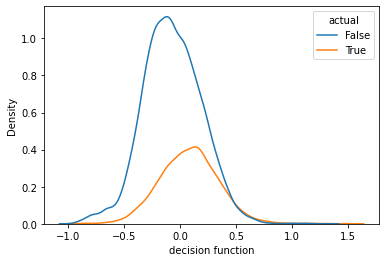

In [ ]:
sns.kdeplot(svc_preds['decision function'], hue = svc_preds['actual'])

# Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, scores, pos_label = True)
prec, rec, thresholds

(array([0.26534958, 0.26536528, 0.26538097, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.45831476e-04, 2.22915738e-04, 0.00000000e+00]),
 array([-0.96080439, -0.93060269, -0.9227759 , ...,  1.33755099,
         1.47197101,  1.49093192]))

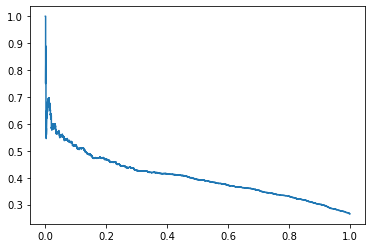

In [ ]:
# Plot recall on the x-axis, and precision on the y-axis
plt.plot(rec, prec)

In [ ]:
# Compute F1
f1 = 2*prec*rec/(prec + rec)

pr_df = pd.DataFrame(index = thresholds)

# We drop the last entry to make it the same length as thresholds
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df['f1'] = f1[:-1]

pr_df

,precision,recall,f1
-0.960804,0.265350,1.000000,0.419409
-0.930603,0.265365,1.000000,0.419429
-0.922776,0.265381,1.000000,0.419448
-0.922021,0.265338,0.999777,0.419374
-0.917267,0.265353,0.999777,0.419394
...,...,...,...
1.293760,0.800000,0.000892,0.001781
1.294142,0.750000,0.000669,0.001336
1.337551,1.000000,0.000669,0.001337
1.471971,1.000000,0.000446,0.000891


<AxesSubplot:>

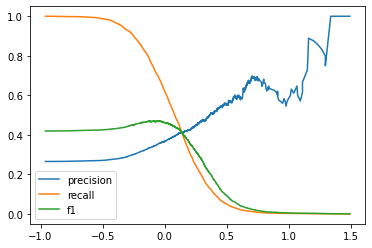

In [ ]:
pr_df.plot()

In [ ]:
y_pred_3 = scores > -0.3

print(classification_report(y_test, y_pred_3, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.29      0.93      0.44      4486
       False       0.87      0.18      0.30     12420

    accuracy                           0.38     16906
   macro avg       0.58      0.55      0.37     16906
weighted avg       0.72      0.38      0.34     16906



## ROC Curve

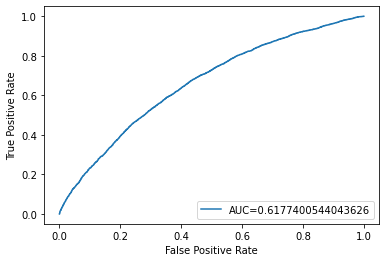

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label = True)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Plot the no-skill classifier for comparision
#plt.plot([0,1], [0,1], linestyle = 'dashed')

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, scores)

0.6609799461986945

In [ ]:
roc_df = pd.DataFrame(index = thresholds)

# For roc, we don't need to drop the last entry
roc_df['tpr'] = tpr
roc_df['fpr'] = fpr

roc_df

,tpr,fpr
2.490932,0.000000,0.000000
1.490932,0.000223,0.000000
1.337551,0.000669,0.000000
1.294142,0.000669,0.000081
1.159102,0.001783,0.000081
...,...,...
-0.909618,0.999554,0.999356
-0.910880,0.999777,0.999356
-0.922021,0.999777,0.999839
-0.922776,1.000000,0.999839


<AxesSubplot:>

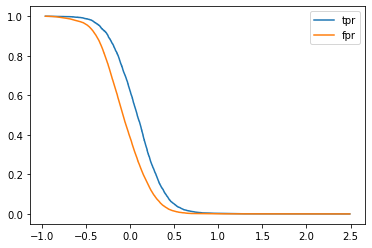

In [ ]:
roc_df.plot()

<AxesSubplot:>

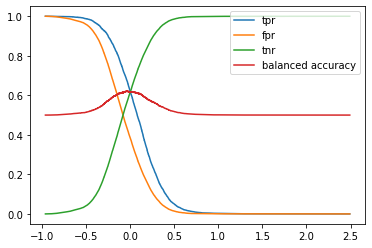

In [ ]:
roc_df['tnr'] = 1 - fpr
roc_df['balanced accuracy'] = (roc_df['tnr'] + roc_df['tpr'])/2

roc_df.plot()

## Non-Linear SVC

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=1)

poly_svc.fit(X_resampled, y_resampled)

y_pred1 = poly_svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.30      0.72      0.42      4486
       False       0.80      0.39      0.52     12420

    accuracy                           0.48     16906
   macro avg       0.55      0.56      0.47     16906
weighted avg       0.66      0.48      0.50     16906



In [ ]:
balanced_accuracy_score(y_test, y_pred1)

0.5556235071645333

In [ ]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1)

rbf_svc.fit(X_resampled, y_resampled)

y_pred2 = rbf_svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.34      0.02      0.03      4486
       False       0.74      0.99      0.84     12420

    accuracy                           0.73     16906
   macro avg       0.54      0.50      0.44     16906
weighted avg       0.63      0.73      0.63     16906



In [ ]:
balanced_accuracy_score(y_test, y_pred2)

0.5024600959291494